In [1]:
## IMPORTS
%matplotlib inline
import os
import phik
import easygui
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm

warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("pulsar_stars.csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64' :
        print("Column {} userfull".format(col))
    else:
        print("Column {} is not userfull".format(col))
        df = df.drop( columns = [col])

Column  Mean of the integrated profile userfull
Column  Standard deviation of the integrated profile userfull
Column  Excess kurtosis of the integrated profile userfull
Column  Skewness of the integrated profile userfull
Column  Mean of the DM-SNR curve userfull
Column  Standard deviation of the DM-SNR curve userfull
Column  Excess kurtosis of the DM-SNR curve userfull
Column  Skewness of the DM-SNR curve userfull
Column target_class userfull


In [5]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


----------------------------------------------------------------------------------

In [6]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 60 + 10
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.10:
        p_stars = '*'
    if p <= 0.05:
        p_stars = '**'
    if p <= 0.01:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes, color='red', fontsize= 55)

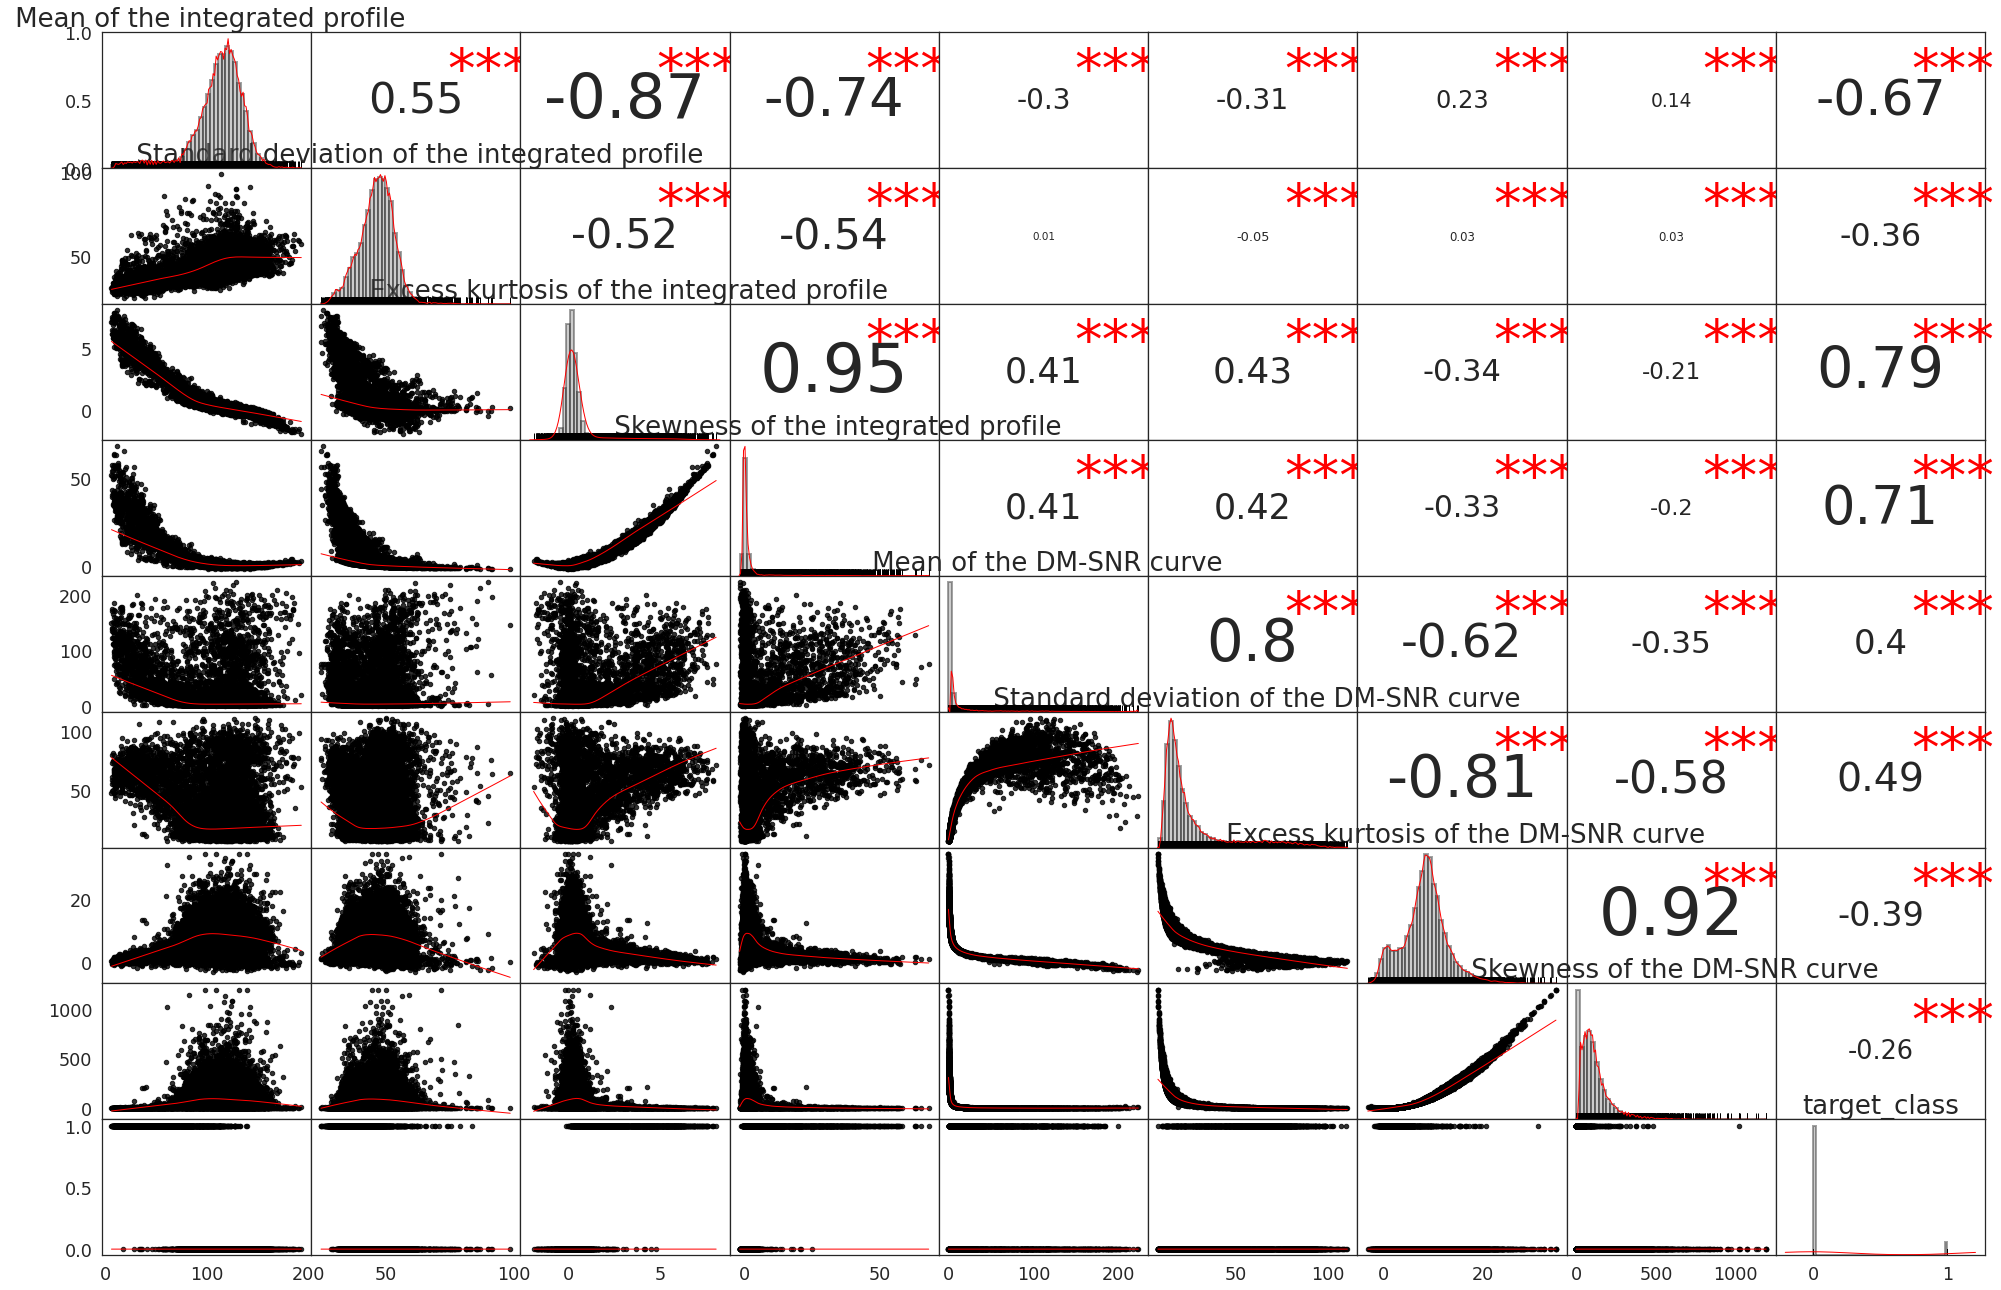

In [7]:
sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1, 'bw': 0.3},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df.columns):
    ax.set_title(col, y=0.82, fontsize=26)
    
# Save plot    
g.savefig("corr_pearson.png")

--------------------------------------------------------------------------------

In [8]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 60 + 30
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.10:
        p_stars = '*'
    if p <= 0.05:
        p_stars = '**'
    if p <= 0.01:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes, color='red', fontsize=70)

In [ ]:
sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1, 'bw': 0.3},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df.columns):
    ax.set_title(col, y=0.82, fontsize=26)
    
# Save plot    
g.savefig("corr_spearman.png")

---------------------------

In [ ]:
def corrdot(*args, **kwargs):
    x,y = args[0].T.values,args[1].T.values
    corr_r = phik.phik_from_array(x,y, num_vars=['x'])
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 60 + 30
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    x,y = x.T.values,y.T.values
    p,s = phik.significance_from_array(x, y, num_vars=['x'])
#     print("p-value: ",p)
#     print(type(p))
#     print("significance: ",s)
#     print(type(s))
    p_stars = ''
    if p <= 0.10:
        p_stars = '*'
    if p <= 0.05:
        p_stars = '**'
    if p <= 0.01:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes, color='red', fontsize=70)

In [ ]:
try:
    sns.set(style='white', font_scale=1.6)
    # iris = sns.load_dataset('iris')
    g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False)
    g.map_lower(sns.regplot, lowess=True, ci=False,
                line_kws={'color': 'red', 'lw': 1},
                scatter_kws={'color': 'black', 's': 20})
    g.map_diag(sns.distplot, color='black',
               kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1,'bw': 0.3},
               hist_kws={'histtype': 'bar', 'lw': 2,
                         'edgecolor': 'k', 'facecolor':'grey'})
    g.map_diag(sns.rugplot, color='black')
    g.map_upper(corrdot)
    g.map_upper(corrfunc)
    g.fig.subplots_adjust(wspace=0, hspace=0)

    # Remove axis labels
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')

    # Add titles to the diagonal axes/subplots
    for ax, col in zip(np.diag(g.axes), df.columns):
        ax.set_title(col, y=0.82, fontsize=26)

    # Save plot    
    g.savefig("corr_phik.png")
except:
    fig, ax = plt.subplots(figsize=(20,20))
    map3 = sns.heatmap(round(df.phik_matrix(),1), annot= True,  ax = ax, linewidth=1, cmap='YlGnBu')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)